<a href="https://colab.research.google.com/github/WOWEunji/AI_Study/blob/main/Q-table_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Q running with random seed

모두의 딥러닝 실습 코드
reference : https://hunkim.github.io/ml/RL/rl-l03.pdf

In [1]:
%%bash
pip install gymnasium
pip install numpy matplotlib
pip install gymnasium[toy-text]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 32.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 48.9 MB/s eta 0:00:00


In [2]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

FrozenLake 환경 생성 하기,

is_slippery = False로 설정, render_mode는 human으로 설정한다(나중에 학습 하는 모습을 npc로 귀엽게 확인 할 수 있음)

![alt](https://github.com/WOWEunji/AI_Study/blob/main/frozen_lake_human_mode.png?raw=1)

In [6]:
env = gym.make("FrozenLake-v1", is_slippery = False)

Q-learning algorithm

$ \hat{Q}(s, a) \leftarrow r + \gamma \max_{a'} \hat{Q}(s',a') $

discount factor
$\gamma$ : .99


In [7]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

dis = .99
num_episodes = 2000
rList = []

In [8]:
for i in range(num_episodes):
    state, info = env.reset()
    rAll = 0
    terminated = False
    #add e-greedy
    #시간이 지날수록 탐색을 덜 하도록 조정(e-greedy)
    e = 1.0 / ((i+1)/100)

    while not terminated:
        # env.render()
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i+1))
        observation, reward,terminated, truncated, info = env.step(action)
        if terminated and reward == 0.0:
            reward = -1.0
        Q[state, action] = reward +dis*np.max(Q[observation, :])
        rAll += reward
        state = observation
        if terminated:
            print(truncated, reward, info)
    rList.append(rAll)
    print(f'num_of_episodes : {i}, {rAll}')

False -1.0 {'prob': 1.0}
num_of_episodes : 0, -1.0
False -1.0 {'prob': 1.0}
num_of_episodes : 1, -1.0
False -1.0 {'prob': 1.0}
num_of_episodes : 2, -1.0
False -1.0 {'prob': 1.0}
num_of_episodes : 3, -1.0
False -1.0 {'prob': 1.0}
num_of_episodes : 4, -1.0
False 1.0 {'prob': 1.0}
num_of_episodes : 5, 1.0
False -1.0 {'prob': 1.0}
num_of_episodes : 6, -1.0
False -1.0 {'prob': 1.0}
num_of_episodes : 7, -1.0
False 1.0 {'prob': 1.0}
num_of_episodes : 8, 1.0
False -1.0 {'prob': 1.0}
num_of_episodes : 9, -1.0
False 1.0 {'prob': 1.0}
num_of_episodes : 10, 1.0
False 1.0 {'prob': 1.0}
num_of_episodes : 11, 1.0
False 1.0 {'prob': 1.0}
num_of_episodes : 12, 1.0
False 1.0 {'prob': 1.0}
num_of_episodes : 13, 1.0
False 1.0 {'prob': 1.0}
num_of_episodes : 14, 1.0
False 1.0 {'prob': 1.0}
num_of_episodes : 15, 1.0
False 1.0 {'prob': 1.0}
num_of_episodes : 16, 1.0
False 1.0 {'prob': 1.0}
num_of_episodes : 17, 1.0
False 1.0 {'prob': 1.0}
num_of_episodes : 18, 1.0
False 1.0 {'prob': 1.0}
num_of_episodes : 19

Success rate : 0.992
Final Q-Tables Values
[[ 0.          0.95099005  0.          0.        ]
 [ 0.         -1.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.         -1.          0.          0.        ]
 [ 0.          0.96059601 -1.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-1.          0.         -1.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.         -1.          0.970299    0.        ]
 [ 0.          0.9801      0.         -1.        ]
 [ 0.          0.99        0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-1.          0.          0.99        0.        ]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          0.        ]]


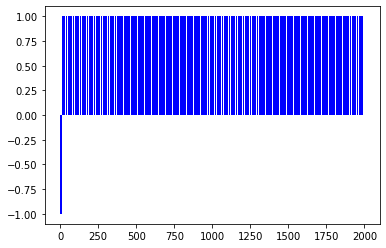

In [9]:
print(f'Success rate : ' + str(sum(rList)/num_episodes))
print("Final Q-Tables Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()